In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
df=pd.read_csv("../Dataset/wsbData.csv")

In [22]:
df.head()

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56


In [23]:
df.drop(columns=['id','url','created'], inplace=True)

In [24]:
df.head()

,title,score,comms_num,body,timestamp
0,"It's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10
2,Exit the system,0,47,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,156,NaN,2021-01-28 21:26:56


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53187 entries, 0 to 53186
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      53187 non-null  object
 1   score      53187 non-null  int64 
 2   comms_num  53187 non-null  int64 
 3   body       24738 non-null  object
 4   timestamp  53187 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.0+ MB


In [26]:
df.isna().sum()

title            0
score            0
comms_num        0
body         28449
timestamp        0
dtype: int64

In [27]:
import re
from nltk import word_tokenize
from nltk.corpus import words
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer

In [35]:
english_words = set(words.words())

In [28]:
reddit_title = df['title'].dropna()
reddit_body = df['body'].dropna()

def clean_text_date(text):
    text = text.lower()

    # Replacing Handlers with Empty String
    text = re.sub('@[^\s]+', '', text)

    # Replacing URLs with Empty String
    text = re.sub(r"http\S+", "", text)

    # Remove all the special characters
    text = ' '.join(re.findall(r'\w+', text))

    # Replacing Single Characters with Empty String
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Removing Extra Spaces
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    return text


# Text Preprocessing
reddit_title = reddit_title.apply(lambda x: clean_text_date(x))
reddit_body = reddit_body.apply(lambda x: clean_text_date(x))


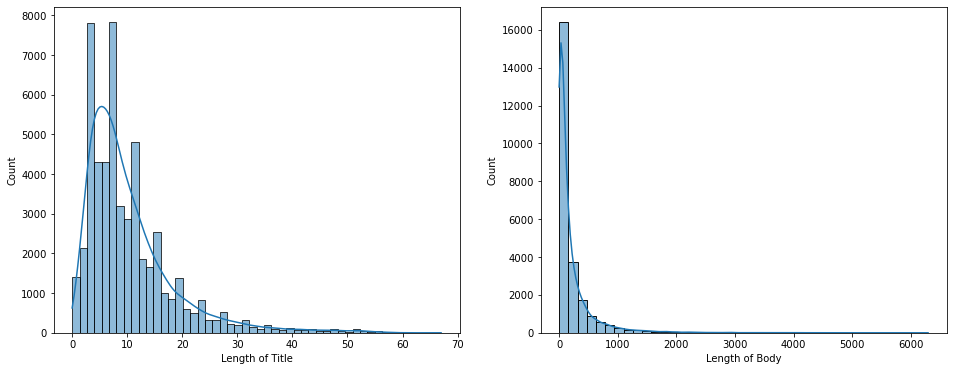

In [36]:
title_length = [len(word_tokenize(text)) for text in reddit_title]
body_length = [len(word_tokenize(text)) for text in reddit_body]

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(title_length, bins=50, kde=True, ax=axis1)
sns.histplot(body_length, bins=40, kde=True, ax=axis2)

axis1.set_xlabel("Length of Title")
axis2.set_xlabel("Length of Body")

plt.show()


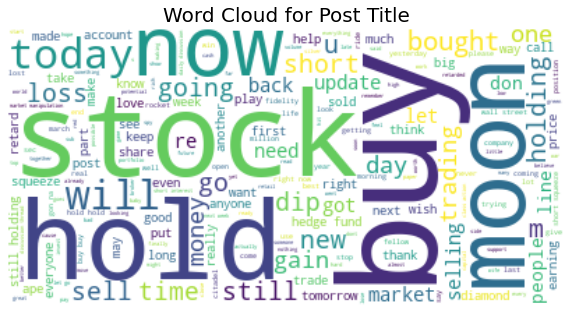

In [37]:
word_tokens = [word_tokenize(text) for text in reddit_title]

word_cloud_string = ""

for word_list in word_tokens:
    for word in word_list:
        if word.lower() in english_words:
            word_cloud_string += word + " "

# Updating some of the Words into Stopwords
description_stopwords = set(STOPWORDS)

my_word_cloud = WordCloud(background_color='white',
                          stopwords=description_stopwords).generate(word_cloud_string)
plt.figure(figsize=(10, 20))
plt.imshow(my_word_cloud, interpolation='bilinear')
plt.title("Word Cloud for Post Title", fontsize=20)
plt.axis('off')
plt.show()


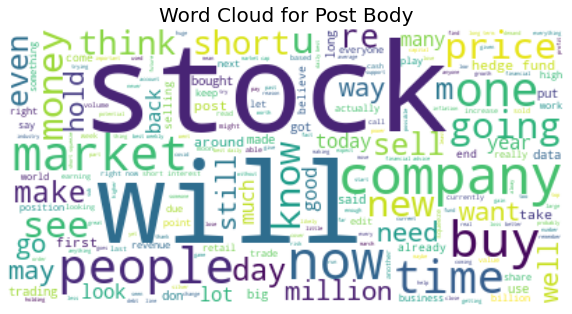

In [38]:
word_tokens = [word_tokenize(text) for text in reddit_body]

word_cloud_string = ""

for word_list in word_tokens:
    for word in word_list:
        if word.lower() in english_words:
            word_cloud_string += word + " "

# Updating some of the Words into Stopwords
description_stopwords = set(STOPWORDS)

my_word_cloud = WordCloud(background_color='white',
                          stopwords=description_stopwords).generate(word_cloud_string)
plt.figure(figsize=(10, 20))
plt.imshow(my_word_cloud, interpolation='bilinear')
plt.title("Word Cloud for Post Body", fontsize=20)
plt.axis('off')
plt.show()


In [39]:
def get_sentiment(sia, text):
    if sia.polarity_scores(text)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(text)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral"


sia = SentimentIntensityAnalyzer()

reddit_title_df = reddit_title.to_frame(name='Title')
reddit_title_df['Sentiment'] = reddit_title_df['Title'].apply(
    lambda x: get_sentiment(sia, x))

reddit_body_df = reddit_body.to_frame(name='Body')
reddit_body_df['Sentiment'] = reddit_body_df['Body'].apply(
    lambda x: get_sentiment(sia, x))


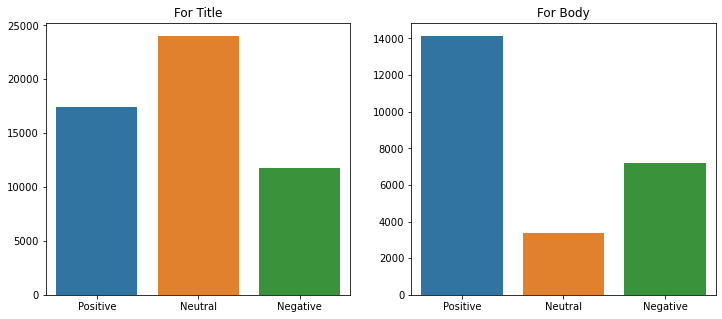

In [40]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(12, 5))

order = ['Positive', 'Neutral', 'Negative']

xs = reddit_title_df['Sentiment'].value_counts().index
ys = reddit_title_df['Sentiment'].value_counts().values
sns.barplot(x=xs, y=ys, order=order, ax=axis1)

xs = reddit_body_df['Sentiment'].value_counts().index
ys = reddit_body_df['Sentiment'].value_counts().values
sns.barplot(x=xs, y=ys, order=order, ax=axis2)

axis1.set_title("For Title")
axis2.set_title("For Body")

plt.show()
